In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import pickle
import seaborn as sns
import csv
from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import drive
drive.mount('/content/Drive')

Mounted at /content/Drive


In [ ]:
reader = csv.reader(open("/content/Drive/MyDrive/context awareness datasets/cardiovascular dataset/Copy of cardiovascular_diseases_dv3.csv", "r"), delimiter=';')
writer = csv.writer(open("/home/cardiovascular_diseases_dv3.csv", 'w'), delimiter=',')
writer.writerows(reader)

In [ ]:
df = pd.read_csv("/home/cardiovascular_diseases_dv3.csv")
df.head(10)

,AGE,GENDER,HEIGHT,WEIGHT,AP_HIGH,AP_LOW,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY,CARDIO_DISEASE
0,50,2,168,62,110,80,1,1,0,0,1,0
1,55,1,156,85,140,90,3,1,0,0,1,1
2,52,1,165,64,130,70,3,1,0,0,0,1
3,48,2,169,82,150,100,1,1,0,0,1,1
4,48,1,156,56,100,60,1,1,0,0,0,0
5,60,1,151,67,120,80,2,2,0,0,0,0
6,61,1,157,93,130,80,3,1,0,0,1,0
7,62,2,178,95,130,90,3,3,0,0,1,1
8,48,1,158,71,110,70,1,1,0,0,1,0
9,54,1,164,68,110,60,1,1,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68564 entries, 0 to 68563
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   AGE                68564 non-null  int64
 1   GENDER             68564 non-null  int64
 2   HEIGHT             68564 non-null  int64
 3   WEIGHT             68564 non-null  int64
 4   AP_HIGH            68564 non-null  int64
 5   AP_LOW             68564 non-null  int64
 6   CHOLESTEROL        68564 non-null  int64
 7   GLUCOSE            68564 non-null  int64
 8   SMOKE              68564 non-null  int64
 9   ALCOHOL            68564 non-null  int64
 10  PHYSICAL_ACTIVITY  68564 non-null  int64
 11  CARDIO_DISEASE     68564 non-null  int64
dtypes: int64(12)
memory usage: 6.3 MB


In [ ]:
sizes = df['ALCOHOL'].value_counts(sort = 1)
print(sizes)

0    64891
1     3673
Name: ALCOHOL, dtype: int64


based on the age information , we will devide our dataset acording to the age to 6 subsets as follows :

1. subset 1 : [30,40]
2. subset 2 : [41,45] 
3. subset 3 : [46,50]
4. subset 4 : [51,55]
5. subset 5 : [56,60]
6. subset 6 : [60,65]


In [ ]:
#diviser l'ensemble de données selon la colonne âge en 6 catégories
df1=df.loc[(df['AGE'] >=30 ) & (df['AGE'] <=40)]
df2=df.loc[(df['AGE'] >40 ) & (df['AGE'] <=45)]
df3=df.loc[(df['AGE'] >45 ) & (df['AGE'] <=50)]
df4=df.loc[(df['AGE'] >50 ) & (df['AGE'] <=55)]
df5=df.loc[(df['AGE'] >55 ) & (df['AGE'] <=60)]
df6=df.loc[(df['AGE'] >60 ) & (df['AGE'] <=65)]

In [ ]:
df6.head(20)

In [ ]:
print(len(df1))
print(len(df2))
print(len(df3))
print(len(df4))
print(len(df5))
print(len(df6))

3074
7523
12986
15215
19576
10190


In [ ]:
X1 = df1.drop("CARDIO_DISEASE", axis = 1)
Y1 = df1['CARDIO_DISEASE']

X2 = df2.drop("CARDIO_DISEASE", axis = 1)
Y2 = df2['CARDIO_DISEASE']

X3 = df3.drop("CARDIO_DISEASE", axis = 1)
Y3 = df3['CARDIO_DISEASE']

X4 = df4.drop("CARDIO_DISEASE", axis = 1)
Y4 = df4['CARDIO_DISEASE']

X5 = df5.drop("CARDIO_DISEASE", axis = 1)
Y5 = df5['CARDIO_DISEASE']

X6 = df6.drop("CARDIO_DISEASE", axis = 1)
Y6 = df6['CARDIO_DISEASE']

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size=0.2, random_state=42,shuffle = True)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, Y2, test_size=0.2, random_state=42,shuffle = True)

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, Y3, test_size=0.2, random_state=42,shuffle = True)

X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, Y4, test_size=0.2, random_state=42,shuffle = True)

X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, Y5, test_size=0.2, random_state=42,shuffle = True)

X_train6, X_test6, y_train6, y_test6 = train_test_split(X6, Y6, test_size=0.2, random_state=42,shuffle = True)



After preparing our data for many models now we are going to create those models and try to optimize each of them by using cross validation 

***
***

# 1. Training and optimization of the first model : 


In [ ]:
model1 = RandomForestClassifier(n_estimators = 11, random_state = 13)

In [ ]:
model1.fit(X_train1, y_train1)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=11,
                       n_jobs=None, oob_score=False, random_state=13, verbose=0,
                       warm_start=False)

In [ ]:
prediction_test1 = model1.predict(X_test1)

In [ ]:
print ("Accuracy = ", metrics.accuracy_score(y_test1, prediction_test1))

Accuracy =  0.8373983739837398


In [ ]:
 #ces paramètres que nous allons tester sur chaque modèle, nous n'avons donc pas besoin de les recréer dans les prochains modèles


In [ ]:
param_grid1=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
                          'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                           15, 16, 17, 18, 19, 20]}]

In [ ]:
#nous n'essaierons ces paramètres que si les premiers paramètres ne donnent pas un bon résultat
param_grid2=[
               {'criterion': ['gini', 'entropy'],
                          'max_depth': [3,4,5, 6, 7, 8, 9, 10, 11, 12, 13, 14,15,16,17,18,19,20],
                          'n_estimators': list(range(3,51))}]

In [ ]:
optimal_params1 = GridSearchCV(
    RandomForestClassifier(),
    param_grid1,
    cv=3,
    scoring='accuracy',
    verbose=2
)

In [ ]:
optimal_params1.fit(X_train1,y_train1)

Fitting 3 folds for each of 320 candidates, totalling 960 fits
[CV] criterion=gini, max_depth=5, n_estimators=5 .....................
[CV] ...... criterion=gini, max_depth=5, n_estimators=5, total=   0.0s
[CV] criterion=gini, max_depth=5, n_estimators=5 .....................
[CV] ...... criterion=gini, max_depth=5, n_estimators=5, total=   0.0s
[CV] criterion=gini, max_depth=5, n_estimators=5 .....................
[CV] ...... criterion=gini, max_depth=5, n_estimators=5, total=   0.0s
[CV] criterion=gini, max_depth=5, n_estimators=6 .....................
[CV] ...... criterion=gini, max_depth=5, n_estimators=6, total=   0.0s
[CV] criterion=gini, max_depth=5, n_estimators=6 .....................
[CV] ...... criterion=gini, max_depth=5, n_estimators=6, total=   0.0s
[CV] criterion=gini, max_depth=5, n_estimators=6 .....................
[CV] ...... criterion=gini, max_depth=5, n_estimators=6, total=   0.0s
[CV] criterion=gini, max_depth=5, n_estimators=7 .....................
[CV] ...... cr

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ...... criterion=gini, max_depth=5, n_estimators=8, total=   0.0s
[CV] criterion=gini, max_depth=5, n_estimators=8 .....................
[CV] ...... criterion=gini, max_depth=5, n_estimators=8, total=   0.0s
[CV] criterion=gini, max_depth=5, n_estimators=9 .....................
[CV] ...... criterion=gini, max_depth=5, n_estimators=9, total=   0.0s
[CV] criterion=gini, max_depth=5, n_estimators=9 .....................
[CV] ...... criterion=gini, max_depth=5, n_estimators=9, total=   0.0s
[CV] criterion=gini, max_depth=5, n_estimators=9 .....................
[CV] ...... criterion=gini, max_depth=5, n_estimators=9, total=   0.0s
[CV] criterion=gini, max_depth=5, n_estimators=10 ....................
[CV] ..... criterion=gini, max_depth=5, n_estimators=10, total=   0.0s
[CV] criterion=gini, max_depth=5, n_estimators=10 ....................
[CV] ..... criterion=gini, max_depth=5, n_estimators=10, total=   0.0s
[CV] criterion=gini, max_depth=5, n_estimators=10 ....................
[CV] .

[Parallel(n_jobs=1)]: Done 960 out of 960 | elapsed:   36.8s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
print(optimal_params1.best_params_)

{'criterion': 'gini', 'max_depth': 5, 'n_estimators': 18}


In [ ]:
model1_optimized = RandomForestClassifier(n_estimators = 18,max_depth=5,criterion='gini', random_state = 13)

In [ ]:
model1_optimized.fit(X_train1, y_train1)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=18,
                       n_jobs=None, oob_score=False, random_state=13, verbose=0,
                       warm_start=False)

In [ ]:
prediction_test1_optimized = model1_optimized.predict(X_test1)

In [ ]:
print ("Accuracy = ", metrics.accuracy_score(y_test1, prediction_test1_optimized))

Accuracy =  0.8601626016260162


In [ ]:
#sauvegarder le prmier modéle de la premiére catégorie 
filename = '/content/Drive/MyDrive/context awareness models/cardiovascular models/random forest models/model 1 optimized acc_86_016.sav'
pickle.dump(model1_optimized, open(filename, 'wb'))

In [ ]:
#matrice de confusion 
cm1 = metrics.confusion_matrix(y_test1,prediction_test1_optimized)
print(cm1)

[[469  13]
 [ 73  60]]


In [ ]:
feature_list1 = list(X1.columns)
feature_imp1 = pd.Series(model1_optimized.feature_importances_,index=feature_list1).sort_values(ascending=False)
print(feature_imp1)

AP_HIGH              0.483756
AP_LOW               0.328732
CHOLESTEROL          0.063105
WEIGHT               0.044970
HEIGHT               0.036103
GLUCOSE              0.017834
SMOKE                0.006106
GENDER               0.005980
AGE                  0.005903
ALCOHOL              0.004559
PHYSICAL_ACTIVITY    0.002954
dtype: float64


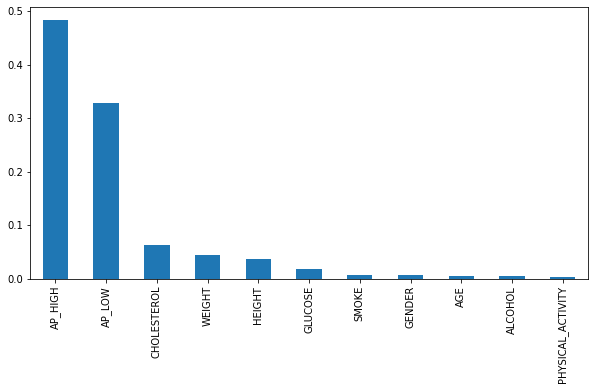

In [ ]:
feature_imp1.plot(kind='bar',figsize=(10,5))

# 2. Formation et optimisation du deuxième modèle : 

---



In [ ]:
model2 = RandomForestClassifier(n_estimators = 11, random_state = 13)

In [ ]:
model2.fit(X_train2, y_train2)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=11,
                       n_jobs=None, oob_score=False, random_state=13, verbose=0,
                       warm_start=False)

In [ ]:
prediction_test2 = model2.predict(X_test2)

In [ ]:
print ("Accuracy = ", metrics.accuracy_score(y_test2, prediction_test2))

Accuracy =  0.7853820598006644


In [ ]:
optimal_params2 = GridSearchCV(
    RandomForestClassifier(),
    param_grid1,
    cv=3,
    scoring='accuracy',
    verbose=2
)

In [ ]:
optimal_params2.fit(X_train2,y_train2)

Fitting 3 folds for each of 320 candidates, totalling 960 fits
[CV] criterion=gini, max_depth=5, n_estimators=5 .....................
[CV] ...... criterion=gini, max_depth=5, n_estimators=5, total=   0.0s
[CV] criterion=gini, max_depth=5, n_estimators=5 .....................
[CV] ...... criterion=gini, max_depth=5, n_estimators=5, total=   0.0s
[CV] criterion=gini, max_depth=5, n_estimators=5 .....................
[CV] ...... criterion=gini, max_depth=5, n_estimators=5, total=   0.0s
[CV] criterion=gini, max_depth=5, n_estimators=6 .....................
[CV] ...... criterion=gini, max_depth=5, n_estimators=6, total=   0.0s
[CV] criterion=gini, max_depth=5, n_estimators=6 .....................
[CV] ...... criterion=gini, max_depth=5, n_estimators=6, total=   0.0s
[CV] criterion=gini, max_depth=5, n_estimators=6 .....................
[CV] ...... criterion=gini, max_depth=5, n_estimators=6, total=   0.0s
[CV] criterion=gini, max_depth=5, n_estimators=7 .....................
[CV] ...... cr

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ...... criterion=gini, max_depth=5, n_estimators=7, total=   0.0s
[CV] criterion=gini, max_depth=5, n_estimators=8 .....................
[CV] ...... criterion=gini, max_depth=5, n_estimators=8, total=   0.0s
[CV] criterion=gini, max_depth=5, n_estimators=8 .....................
[CV] ...... criterion=gini, max_depth=5, n_estimators=8, total=   0.0s
[CV] criterion=gini, max_depth=5, n_estimators=8 .....................
[CV] ...... criterion=gini, max_depth=5, n_estimators=8, total=   0.0s
[CV] criterion=gini, max_depth=5, n_estimators=9 .....................
[CV] ...... criterion=gini, max_depth=5, n_estimators=9, total=   0.0s
[CV] criterion=gini, max_depth=5, n_estimators=9 .....................
[CV] ...... criterion=gini, max_depth=5, n_estimators=9, total=   0.0s
[CV] criterion=gini, max_depth=5, n_estimators=9 .....................
[CV] ...... criterion=gini, max_depth=5, n_estimators=9, total=   0.0s
[CV] criterion=gini, max_depth=5, n_estimators=10 ....................
[CV] .

[Parallel(n_jobs=1)]: Done 960 out of 960 | elapsed:   55.3s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
print(optimal_params2.best_params_)

{'criterion': 'gini', 'max_depth': 9, 'n_estimators': 15}


In [ ]:
model2_optimized = RandomForestClassifier(n_estimators = 15,max_depth=9,criterion='gini', random_state = 13)

In [ ]:
model2_optimized.fit(X_train2, y_train2)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=13, verbose=0,
                       warm_start=False)

In [ ]:
prediction_test2_optimized = model2_optimized.predict(X_test2)

In [ ]:
print ("Accuracy = ", metrics.accuracy_score(y_test2, prediction_test2_optimized))

Accuracy =  0.8046511627906977


In [ ]:
#sauvegarder le modéle du deuxiéme catégorie 
filename = '/content/Drive/MyDrive/context awareness models/cardiovascular models/random forest models/model 2 optimized acc_80_465.sav'
pickle.dump(model2_optimized, open(filename, 'wb'))

In [ ]:
#matrice de confusion 
cm2 = metrics.confusion_matrix(y_test2,prediction_test2_optimized)
print(cm2)

[[935  67]
 [227 276]]


In [ ]:
feature_list2 = list(X2.columns)
feature_imp2 = pd.Series(model2_optimized.feature_importances_,index=feature_list2).sort_values(ascending=False)
print(feature_imp2)

AP_HIGH              0.411423
AP_LOW               0.273297
WEIGHT               0.092211
CHOLESTEROL          0.070173
HEIGHT               0.065003
AGE                  0.027692
GLUCOSE              0.019601
PHYSICAL_ACTIVITY    0.012507
GENDER               0.009809
ALCOHOL              0.009771
SMOKE                0.008514
dtype: float64


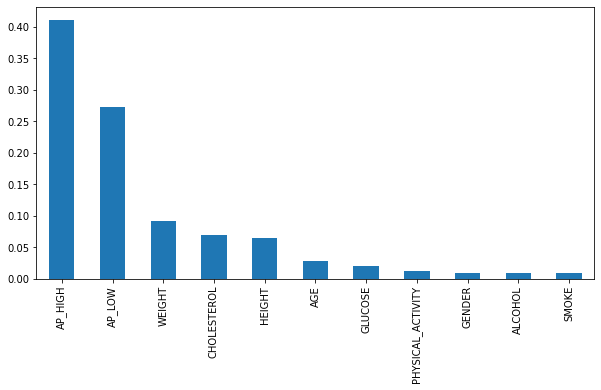

In [ ]:
feature_imp2.plot(kind='bar',figsize=(10,5))

# 3. Formation et optimisation du troisième modèle : 

In [ ]:
model3 = RandomForestClassifier(n_estimators = 11, random_state = 13)

In [ ]:
model3.fit(X_train3, y_train3)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=11,
                       n_jobs=None, oob_score=False, random_state=13, verbose=0,
                       warm_start=False)

In [ ]:
prediction_test3 = model3.predict(X_test3)

In [ ]:
print ("Accuracy = ", metrics.accuracy_score(y_test3, prediction_test3))

Accuracy =  0.7051578137028484


In [ ]:
optimal_params3 = GridSearchCV(
    RandomForestClassifier(),
    param_grid1,
    cv=3,
    scoring='accuracy',
    verbose=2
)

In [ ]:
optimal_params3.fit(X_train3,y_train3)

Fitting 3 folds for each of 320 candidates, totalling 960 fits
[CV] criterion=gini, max_depth=5, n_estimators=5 .....................
[CV] ...... criterion=gini, max_depth=5, n_estimators=5, total=   0.0s
[CV] criterion=gini, max_depth=5, n_estimators=5 .....................
[CV] ...... criterion=gini, max_depth=5, n_estimators=5, total=   0.0s
[CV] criterion=gini, max_depth=5, n_estimators=5 .....................
[CV] ...... criterion=gini, max_depth=5, n_estimators=5, total=   0.0s
[CV] criterion=gini, max_depth=5, n_estimators=6 .....................
[CV] ...... criterion=gini, max_depth=5, n_estimators=6, total=   0.0s
[CV] criterion=gini, max_depth=5, n_estimators=6 .....................
[CV] ...... criterion=gini, max_depth=5, n_estimators=6, total=   0.0s
[CV] criterion=gini, max_depth=5, n_estimators=6 .....................
[CV] ...... criterion=gini, max_depth=5, n_estimators=6, total=   0.0s
[CV] criterion=gini, max_depth=5, n_estimators=7 .....................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ...... criterion=gini, max_depth=5, n_estimators=7, total=   0.0s
[CV] criterion=gini, max_depth=5, n_estimators=7 .....................
[CV] ...... criterion=gini, max_depth=5, n_estimators=7, total=   0.0s
[CV] criterion=gini, max_depth=5, n_estimators=7 .....................
[CV] ...... criterion=gini, max_depth=5, n_estimators=7, total=   0.0s
[CV] criterion=gini, max_depth=5, n_estimators=8 .....................
[CV] ...... criterion=gini, max_depth=5, n_estimators=8, total=   0.0s
[CV] criterion=gini, max_depth=5, n_estimators=8 .....................
[CV] ...... criterion=gini, max_depth=5, n_estimators=8, total=   0.0s
[CV] criterion=gini, max_depth=5, n_estimators=8 .....................
[CV] ...... criterion=gini, max_depth=5, n_estimators=8, total=   0.0s
[CV] criterion=gini, max_depth=5, n_estimators=9 .....................
[CV] ...... criterion=gini, max_depth=5, n_estimators=9, total=   0.0s
[CV] criterion=gini, max_depth=5, n_estimators=9 .....................
[CV] .

[Parallel(n_jobs=1)]: Done 960 out of 960 | elapsed:  1.3min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
print(optimal_params3.best_params_)

{'criterion': 'entropy', 'max_depth': 8, 'n_estimators': 19}


In [ ]:
model3_optimized = RandomForestClassifier(n_estimators = 19,max_depth=8,criterion='entropy', random_state = 13)

In [ ]:
model3_optimized.fit(X_train3, y_train3)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=13, verbose=0,
                       warm_start=False)

In [ ]:
prediction_test3_optimized = model3_optimized.predict(X_test3)

In [ ]:
print ("Accuracy = ", metrics.accuracy_score(y_test3, prediction_test3_optimized))

Accuracy =  0.7544264819091608


In [ ]:
#sauvegarder le modéle du troisiéme catégorie 
filename = '/content/Drive/MyDrive/context awareness models/cardiovascular models/random forest models/model 3 optimized acc_75_442.sav'
pickle.dump(model3_optimized, open(filename, 'wb'))

In [ ]:
#matrice de confusion 
cm3 = metrics.confusion_matrix(y_test3,prediction_test3_optimized)
print(cm3)

[[1274  203]
 [ 435  686]]


In [ ]:
feature_list3 = list(X3.columns)
feature_imp3 = pd.Series(model3_optimized.feature_importances_,index=feature_list3).sort_values(ascending=False)
print(feature_imp3)

AP_HIGH              0.384833
AP_LOW               0.281730
WEIGHT               0.102277
CHOLESTEROL          0.076925
HEIGHT               0.060670
AGE                  0.028577
GLUCOSE              0.020526
PHYSICAL_ACTIVITY    0.013585
ALCOHOL              0.010702
SMOKE                0.010151
GENDER               0.010023
dtype: float64


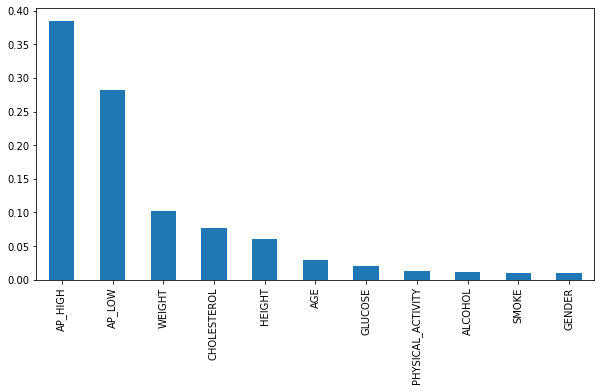

In [ ]:
feature_imp3.plot(kind='bar',figsize=(10,5))

# 4. Formation et optimisation du quatriéme modèle : 

In [ ]:
model4 = RandomForestClassifier(n_estimators = 11, random_state = 13)

In [ ]:
model4.fit(X_train4, y_train4)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=11,
                       n_jobs=None, oob_score=False, random_state=13, verbose=0,
                       warm_start=False)

In [ ]:
prediction_test4 = model4.predict(X_test4)

In [ ]:
print ("Accuracy = ", metrics.accuracy_score(y_test4, prediction_test4))

Accuracy =  0.6707196845218535


In [ ]:
optimal_params4 = GridSearchCV(
    RandomForestClassifier(),
    param_grid1,
    cv=3,
    scoring='accuracy',
    verbose=2
)

In [ ]:
optimal_params4.fit(X_train4,y_train4)

Fitting 3 folds for each of 320 candidates, totalling 960 fits
[CV] criterion=gini, max_depth=5, n_estimators=5 .....................
[CV] ...... criterion=gini, max_depth=5, n_estimators=5, total=   0.0s
[CV] criterion=gini, max_depth=5, n_estimators=5 .....................
[CV] ...... criterion=gini, max_depth=5, n_estimators=5, total=   0.0s
[CV] criterion=gini, max_depth=5, n_estimators=5 .....................
[CV] ...... criterion=gini, max_depth=5, n_estimators=5, total=   0.0s
[CV] criterion=gini, max_depth=5, n_estimators=6 .....................
[CV] ...... criterion=gini, max_depth=5, n_estimators=6, total=   0.0s
[CV] criterion=gini, max_depth=5, n_estimators=6 .....................
[CV] ...... criterion=gini, max_depth=5, n_estimators=6, total=   0.0s
[CV] criterion=gini, max_depth=5, n_estimators=6 .....................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ...... criterion=gini, max_depth=5, n_estimators=6, total=   0.0s
[CV] criterion=gini, max_depth=5, n_estimators=7 .....................
[CV] ...... criterion=gini, max_depth=5, n_estimators=7, total=   0.0s
[CV] criterion=gini, max_depth=5, n_estimators=7 .....................
[CV] ...... criterion=gini, max_depth=5, n_estimators=7, total=   0.0s
[CV] criterion=gini, max_depth=5, n_estimators=7 .....................
[CV] ...... criterion=gini, max_depth=5, n_estimators=7, total=   0.0s
[CV] criterion=gini, max_depth=5, n_estimators=8 .....................
[CV] ...... criterion=gini, max_depth=5, n_estimators=8, total=   0.0s
[CV] criterion=gini, max_depth=5, n_estimators=8 .....................
[CV] ...... criterion=gini, max_depth=5, n_estimators=8, total=   0.0s
[CV] criterion=gini, max_depth=5, n_estimators=8 .....................
[CV] ...... criterion=gini, max_depth=5, n_estimators=8, total=   0.0s
[CV] criterion=gini, max_depth=5, n_estimators=9 .....................
[CV] .

[Parallel(n_jobs=1)]: Done 960 out of 960 | elapsed:  1.4min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
print(optimal_params4.best_params_)

{'criterion': 'gini', 'max_depth': 5, 'n_estimators': 20}


In [ ]:
model4_optimized = RandomForestClassifier(n_estimators = 20,max_depth=5,criterion='gini', random_state = 13)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=13, verbose=0,
                       warm_start=False)

In [ ]:
prediction_test4_optimized = model4_optimized.predict(X_test4)

In [ ]:
print ("Accuracy = ", metrics.accuracy_score(y_test4, prediction_test4_optimized))

Accuracy =  0.720341767992113


In [ ]:
## cette validation croisée n'a pas donné un bon résultat, nous devons donc essayer les deuxièmes paramètres

In [ ]:
optimal_params4 = GridSearchCV(
    RandomForestClassifier(),
    param_grid2,
    cv=3,
    scoring='accuracy',
    verbose=2
)

In [ ]:
optimal_params4.fit(X_train4,y_train4)

Fitting 3 folds for each of 1728 candidates, totalling 5184 fits
[CV] criterion=gini, max_depth=3, n_estimators=3 .....................
[CV] ...... criterion=gini, max_depth=3, n_estimators=3, total=   0.0s
[CV] criterion=gini, max_depth=3, n_estimators=3 .....................
[CV] ...... criterion=gini, max_depth=3, n_estimators=3, total=   0.0s
[CV] criterion=gini, max_depth=3, n_estimators=3 .....................
[CV] ...... criterion=gini, max_depth=3, n_estimators=3, total=   0.0s
[CV] criterion=gini, max_depth=3, n_estimators=4 .....................
[CV] ...... criterion=gini, max_depth=3, n_estimators=4, total=   0.0s
[CV] criterion=gini, max_depth=3, n_estimators=4 .....................
[CV] ...... criterion=gini, max_depth=3, n_estimators=4, total=   0.0s
[CV] criterion=gini, max_depth=3, n_estimators=4 .....................
[CV] ...... criterion=gini, max_depth=3, n_estimators=4, total=   0.0s
[CV] criterion=gini, max_depth=3, n_estimators=5 .....................
[CV] ...... 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Streaming output truncated to the last 5000 lines.
[CV] criterion=entropy, max_depth=3, n_estimators=33 .................
[CV] .. criterion=entropy, max_depth=3, n_estimators=33, total=   0.1s
[CV] criterion=entropy, max_depth=3, n_estimators=34 .................
[CV] .. criterion=entropy, max_depth=3, n_estimators=34, total=   0.1s
[CV] criterion=entropy, max_depth=3, n_estimators=34 .................
[CV] .. criterion=entropy, max_depth=3, n_estimators=34, total=   0.1s
[CV] criterion=entropy, max_depth=3, n_estimators=34 .................
[CV] .. criterion=entropy, max_depth=3, n_estimators=34, total=   0.1s
[CV] criterion=entropy, max_depth=3, n_estimators=35 .................
[CV] .. criterion=entropy, max_depth=3, n_estimators=35, total=   0.1s
[CV] criterion=entropy, max_depth=3, n_estimators=35 .................
[CV] .. criterion=entropy, max_depth=3, n_estimators=35, total=   0.1s
[CV] criterion=entropy, max_depth=3, n_estimators=35 .................
[CV] .. criterion=entropy,

[Parallel(n_jobs=1)]: Done 5184 out of 5184 | elapsed: 17.4min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              random_state=None, verbose=0,
                                   

In [ ]:
print(optimal_params4.best_params_)

{'criterion': 'entropy', 'max_depth': 7, 'n_estimators': 17}


In [ ]:
model4_optimized = RandomForestClassifier(n_estimators = 17,max_depth=7,criterion='entropy', random_state = 13)

In [ ]:
model4_optimized.fit(X_train4, y_train4)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=17,
                       n_jobs=None, oob_score=False, random_state=13, verbose=0,
                       warm_start=False)

In [ ]:
prediction_test4_optimized = model4_optimized.predict(X_test4)

In [ ]:
print ("Accuracy = ", metrics.accuracy_score(y_test4, prediction_test4_optimized))

Accuracy =  0.725928360170884


In [ ]:
#aprés avoir une bonne Accuracy du 4ieme modele  , on le sauvegarder 
filename = '/content/Drive/MyDrive/context awareness models/cardiovascular models/random forest models/model 4 optimized acc_72_592.sav'
pickle.dump(model4_optimized, open(filename, 'wb'))

In [ ]:
#matrice de confusion 
cm4 = metrics.confusion_matrix(y_test4,prediction_test4_optimized)
print(cm4)

[[1315  267]
 [ 567  894]]


In [ ]:
feature_list4 = list(X4.columns)
feature_imp4 = pd.Series(model4_optimized.feature_importances_,index=feature_list4).sort_values(ascending=False)
print(feature_imp4)

AP_HIGH              0.456135
AP_LOW               0.301428
CHOLESTEROL          0.075817
WEIGHT               0.072903
HEIGHT               0.034652
AGE                  0.019389
GLUCOSE              0.014644
PHYSICAL_ACTIVITY    0.009854
GENDER               0.005319
ALCOHOL              0.005042
SMOKE                0.004816
dtype: float64


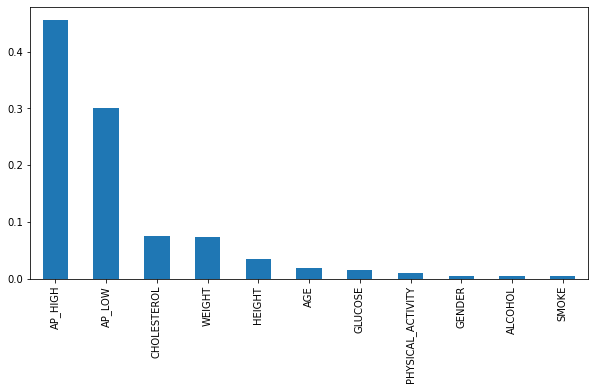

In [ ]:
feature_imp4.plot(kind='bar',figsize=(10,5))

# 5. Formation et optimisation du cinquième modèle : 

In [ ]:
model5 = RandomForestClassifier(n_estimators = 11, random_state = 13)

In [ ]:
model5.fit(X_train5, y_train5)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=11,
                       n_jobs=None, oob_score=False, random_state=13, verbose=0,
                       warm_start=False)

In [ ]:
prediction_test5 = model5.predict(X_test5)

In [ ]:
print ("Accuracy = ", metrics.accuracy_score(y_test5, prediction_test5))

Accuracy =  0.6432584269662921


In [ ]:
optimal_params5 = GridSearchCV(
    RandomForestClassifier(),
    param_grid1,
    cv=3,
    scoring='accuracy',
    verbose=2
)

In [ ]:
optimal_params5.fit(X_train5,y_train5)

Fitting 3 folds for each of 320 candidates, totalling 960 fits
[CV] criterion=gini, max_depth=5, n_estimators=5 .....................
[CV] ...... criterion=gini, max_depth=5, n_estimators=5, total=   0.0s
[CV] criterion=gini, max_depth=5, n_estimators=5 .....................
[CV] ...... criterion=gini, max_depth=5, n_estimators=5, total=   0.0s
[CV] criterion=gini, max_depth=5, n_estimators=5 .....................
[CV] ...... criterion=gini, max_depth=5, n_estimators=5, total=   0.0s
[CV] criterion=gini, max_depth=5, n_estimators=6 .....................
[CV] ...... criterion=gini, max_depth=5, n_estimators=6, total=   0.0s
[CV] criterion=gini, max_depth=5, n_estimators=6 .....................
[CV] ...... criterion=gini, max_depth=5, n_estimators=6, total=   0.0s
[CV] criterion=gini, max_depth=5, n_estimators=6 .....................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ...... criterion=gini, max_depth=5, n_estimators=6, total=   0.0s
[CV] criterion=gini, max_depth=5, n_estimators=7 .....................
[CV] ...... criterion=gini, max_depth=5, n_estimators=7, total=   0.0s
[CV] criterion=gini, max_depth=5, n_estimators=7 .....................
[CV] ...... criterion=gini, max_depth=5, n_estimators=7, total=   0.0s
[CV] criterion=gini, max_depth=5, n_estimators=7 .....................
[CV] ...... criterion=gini, max_depth=5, n_estimators=7, total=   0.0s
[CV] criterion=gini, max_depth=5, n_estimators=8 .....................
[CV] ...... criterion=gini, max_depth=5, n_estimators=8, total=   0.1s
[CV] criterion=gini, max_depth=5, n_estimators=8 .....................
[CV] ...... criterion=gini, max_depth=5, n_estimators=8, total=   0.1s
[CV] criterion=gini, max_depth=5, n_estimators=8 .....................
[CV] ...... criterion=gini, max_depth=5, n_estimators=8, total=   0.0s
[CV] criterion=gini, max_depth=5, n_estimators=9 .....................
[CV] .

[Parallel(n_jobs=1)]: Done 960 out of 960 | elapsed:  1.7min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
print(optimal_params5.best_params_)

{'criterion': 'gini', 'max_depth': 7, 'n_estimators': 19}


In [ ]:
model5_optimized = RandomForestClassifier(n_estimators = 19,max_depth=7,criterion='gini', random_state = 13)

In [ ]:
model5_optimized.fit(X_train5, y_train5)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=19,
                       n_jobs=None, oob_score=False, random_state=13, verbose=0,
                       warm_start=False)

In [ ]:
prediction_test5_optimized = model5_optimized.predict(X_test5)

In [ ]:
print ("Accuracy = ", metrics.accuracy_score(y_test5, prediction_test5_optimized))

Accuracy =  0.6894790602655771


In [ ]:
#nous essayons les seconds paramètres pour voir si nous pouvons augmenter la précision

In [ ]:
optimal_params5 = GridSearchCV(
    RandomForestClassifier(),
    param_grid2,
    cv=3,
    scoring='accuracy',
    verbose=2
)

In [ ]:
optimal_params5.fit(X_train5,y_train5)

Fitting 3 folds for each of 1728 candidates, totalling 5184 fits
[CV] criterion=gini, max_depth=3, n_estimators=3 .....................
[CV] ...... criterion=gini, max_depth=3, n_estimators=3, total=   0.0s
[CV] criterion=gini, max_depth=3, n_estimators=3 .....................
[CV] ...... criterion=gini, max_depth=3, n_estimators=3, total=   0.0s
[CV] criterion=gini, max_depth=3, n_estimators=3 .....................
[CV] ...... criterion=gini, max_depth=3, n_estimators=3, total=   0.0s
[CV] criterion=gini, max_depth=3, n_estimators=4 .....................
[CV] ...... criterion=gini, max_depth=3, n_estimators=4, total=   0.0s
[CV] criterion=gini, max_depth=3, n_estimators=4 .....................
[CV] ...... criterion=gini, max_depth=3, n_estimators=4, total=   0.0s
[CV] criterion=gini, max_depth=3, n_estimators=4 .....................
[CV] ...... criterion=gini, max_depth=3, n_estimators=4, total=   0.0s
[CV] criterion=gini, max_depth=3, n_estimators=5 .....................
[CV] ...... 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Streaming output truncated to the last 5000 lines.
[CV] criterion=entropy, max_depth=3, n_estimators=33 .................
[CV] .. criterion=entropy, max_depth=3, n_estimators=33, total=   0.1s
[CV] criterion=entropy, max_depth=3, n_estimators=34 .................
[CV] .. criterion=entropy, max_depth=3, n_estimators=34, total=   0.2s
[CV] criterion=entropy, max_depth=3, n_estimators=34 .................
[CV] .. criterion=entropy, max_depth=3, n_estimators=34, total=   0.2s
[CV] criterion=entropy, max_depth=3, n_estimators=34 .................
[CV] .. criterion=entropy, max_depth=3, n_estimators=34, total=   0.2s
[CV] criterion=entropy, max_depth=3, n_estimators=35 .................
[CV] .. criterion=entropy, max_depth=3, n_estimators=35, total=   0.2s
[CV] criterion=entropy, max_depth=3, n_estimators=35 .................
[CV] .. criterion=entropy, max_depth=3, n_estimators=35, total=   0.2s
[CV] criterion=entropy, max_depth=3, n_estimators=35 .................
[CV] .. criterion=entropy,

[Parallel(n_jobs=1)]: Done 5184 out of 5184 | elapsed: 21.5min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              random_state=None, verbose=0,
                                   

In [ ]:
print(optimal_params5.best_params_)

{'criterion': 'entropy', 'max_depth': 9, 'n_estimators': 28}


In [ ]:
model5_optimized = RandomForestClassifier(n_estimators = 28,max_depth=9,criterion='entropy', random_state = 13)

In [ ]:
model5_optimized.fit(X_train5, y_train5)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=21,
                       n_jobs=None, oob_score=False, random_state=13, verbose=0,
                       warm_start=False)

In [ ]:
prediction_test5_optimized = model5_optimized.predict(X_test5)

In [ ]:
print ("Accuracy = ", metrics.accuracy_score(y_test5, prediction_test5_optimized))

Accuracy =  0.693564862104188


In [ ]:
#sauvegarder le 5ieme modele
filename = '/content/Drive/MyDrive/context awareness models/cardiovascular models/random forest models/model 5 optimized acc_69_356.sav'
pickle.dump(model5_optimized, open(filename, 'wb'))

In [ ]:
#matrice de confusion 
cm5 = metrics.confusion_matrix(y_test5,prediction_test5_optimized)
print(cm5)

[[1271  467]
 [ 733 1445]]


In [ ]:
feature_list5 = list(X5.columns)
feature_imp5 = pd.Series(model5_optimized.feature_importances_,index=feature_list5).sort_values(ascending=False)
print(feature_imp5)

AP_HIGH              0.398065
AP_LOW               0.239031
WEIGHT               0.096226
CHOLESTEROL          0.095104
HEIGHT               0.069406
AGE                  0.029970
GLUCOSE              0.021730
PHYSICAL_ACTIVITY    0.015283
GENDER               0.013311
SMOKE                0.012631
ALCOHOL              0.009244
dtype: float64


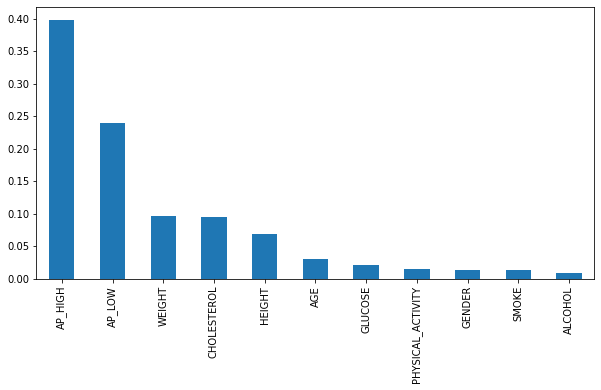

In [ ]:
feature_imp5.plot(kind='bar',figsize=(10,5))

# 6. Formation et optimisation du sixième modèle: : 

In [ ]:
model6 = RandomForestClassifier(n_estimators = 11, random_state = 13)

In [ ]:
model6.fit(X_train6, y_train6)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=11,
                       n_jobs=None, oob_score=False, random_state=13, verbose=0,
                       warm_start=False)

In [ ]:
prediction_test6 = model6.predict(X_test6)

In [ ]:
print ("Accuracy = ", metrics.accuracy_score(y_test6, prediction_test6))

Accuracy =  0.6781157998037292


In [ ]:
optimal_params6 = GridSearchCV(
    RandomForestClassifier(),
    param_grid1,
    cv=3,
    scoring='accuracy',
    verbose=2
)

In [ ]:
optimal_params6.fit(X_train6,y_train6)

Fitting 3 folds for each of 320 candidates, totalling 960 fits
[CV] criterion=gini, max_depth=5, n_estimators=5 .....................
[CV] ...... criterion=gini, max_depth=5, n_estimators=5, total=   0.0s
[CV] criterion=gini, max_depth=5, n_estimators=5 .....................
[CV] ...... criterion=gini, max_depth=5, n_estimators=5, total=   0.0s
[CV] criterion=gini, max_depth=5, n_estimators=5 .....................
[CV] ...... criterion=gini, max_depth=5, n_estimators=5, total=   0.0s
[CV] criterion=gini, max_depth=5, n_estimators=6 .....................
[CV] ...... criterion=gini, max_depth=5, n_estimators=6, total=   0.0s
[CV] criterion=gini, max_depth=5, n_estimators=6 .....................
[CV] ...... criterion=gini, max_depth=5, n_estimators=6, total=   0.0s
[CV] criterion=gini, max_depth=5, n_estimators=6 .....................
[CV] ...... criterion=gini, max_depth=5, n_estimators=6, total=   0.0s
[CV] criterion=gini, max_depth=5, n_estimators=7 .....................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ...... criterion=gini, max_depth=5, n_estimators=7, total=   0.0s
[CV] criterion=gini, max_depth=5, n_estimators=7 .....................
[CV] ...... criterion=gini, max_depth=5, n_estimators=7, total=   0.0s
[CV] criterion=gini, max_depth=5, n_estimators=7 .....................
[CV] ...... criterion=gini, max_depth=5, n_estimators=7, total=   0.0s
[CV] criterion=gini, max_depth=5, n_estimators=8 .....................
[CV] ...... criterion=gini, max_depth=5, n_estimators=8, total=   0.0s
[CV] criterion=gini, max_depth=5, n_estimators=8 .....................
[CV] ...... criterion=gini, max_depth=5, n_estimators=8, total=   0.0s
[CV] criterion=gini, max_depth=5, n_estimators=8 .....................
[CV] ...... criterion=gini, max_depth=5, n_estimators=8, total=   0.0s
[CV] criterion=gini, max_depth=5, n_estimators=9 .....................
[CV] ...... criterion=gini, max_depth=5, n_estimators=9, total=   0.0s
[CV] criterion=gini, max_depth=5, n_estimators=9 .....................
[CV] .

[Parallel(n_jobs=1)]: Done 960 out of 960 | elapsed:  1.2min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
print(optimal_params6.best_params_)

{'criterion': 'entropy', 'max_depth': 8, 'n_estimators': 18}


In [ ]:
model6_optimized = RandomForestClassifier(n_estimators = 18,max_depth=8,criterion='entropy', random_state = 13)

In [ ]:
model6_optimized.fit(X_train6, y_train6)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=18,
                       n_jobs=None, oob_score=False, random_state=13, verbose=0,
                       warm_start=False)

In [ ]:
prediction_test6_optimized = model6_optimized.predict(X_test6)

In [ ]:
print ("Accuracy = ", metrics.accuracy_score(y_test6, prediction_test6_optimized))

Accuracy =  0.7021589793915604


In [ ]:
#maintenant nous allons essayer les seconds paramètres pour voir s'ils sont meilleurs que les premiers paramètres

In [ ]:
optimal_params6 = GridSearchCV(
    RandomForestClassifier(),
    param_grid2,
    cv=3,
    scoring='accuracy',
    verbose=2
)

In [ ]:
optimal_params6.fit(X_train6,y_train6)

Fitting 3 folds for each of 1728 candidates, totalling 5184 fits
[CV] criterion=gini, max_depth=3, n_estimators=3 .....................
[CV] ...... criterion=gini, max_depth=3, n_estimators=3, total=   0.0s
[CV] criterion=gini, max_depth=3, n_estimators=3 .....................
[CV] ...... criterion=gini, max_depth=3, n_estimators=3, total=   0.0s
[CV] criterion=gini, max_depth=3, n_estimators=3 .....................
[CV] ...... criterion=gini, max_depth=3, n_estimators=3, total=   0.0s
[CV] criterion=gini, max_depth=3, n_estimators=4 .....................
[CV] ...... criterion=gini, max_depth=3, n_estimators=4, total=   0.0s
[CV] criterion=gini, max_depth=3, n_estimators=4 .....................
[CV] ...... criterion=gini, max_depth=3, n_estimators=4, total=   0.0s
[CV] criterion=gini, max_depth=3, n_estimators=4 .....................
[CV] ...... criterion=gini, max_depth=3, n_estimators=4, total=   0.0s
[CV] criterion=gini, max_depth=3, n_estimators=5 .....................
[CV] ...... 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Streaming output truncated to the last 5000 lines.
[CV] criterion=entropy, max_depth=3, n_estimators=33 .................
[CV] .. criterion=entropy, max_depth=3, n_estimators=33, total=   0.1s
[CV] criterion=entropy, max_depth=3, n_estimators=34 .................
[CV] .. criterion=entropy, max_depth=3, n_estimators=34, total=   0.1s
[CV] criterion=entropy, max_depth=3, n_estimators=34 .................
[CV] .. criterion=entropy, max_depth=3, n_estimators=34, total=   0.1s
[CV] criterion=entropy, max_depth=3, n_estimators=34 .................
[CV] .. criterion=entropy, max_depth=3, n_estimators=34, total=   0.1s
[CV] criterion=entropy, max_depth=3, n_estimators=35 .................
[CV] .. criterion=entropy, max_depth=3, n_estimators=35, total=   0.1s
[CV] criterion=entropy, max_depth=3, n_estimators=35 .................
[CV] .. criterion=entropy, max_depth=3, n_estimators=35, total=   0.1s
[CV] criterion=entropy, max_depth=3, n_estimators=35 .................
[CV] .. criterion=entropy,

[Parallel(n_jobs=1)]: Done 5184 out of 5184 | elapsed: 13.7min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              random_state=None, verbose=0,
                                   

In [ ]:
print(optimal_params6.best_params_)

{'criterion': 'gini', 'max_depth': 7, 'n_estimators': 35}


In [ ]:
model6_optimized = RandomForestClassifier(n_estimators = 35,max_depth=7,criterion='gini', random_state = 13)

In [ ]:
model6_optimized.fit(X_train6, y_train6)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=35,
                       n_jobs=None, oob_score=False, random_state=13, verbose=0,
                       warm_start=False)

In [ ]:
prediction_test6_optimized = model6_optimized.predict(X_test6)

In [ ]:
print ("Accuracy = ", metrics.accuracy_score(y_test6, prediction_test6_optimized))

Accuracy =  0.7105004906771345


In [ ]:
#le sauvegarder automatiquement aprés avoir aumgenté l'Accuracy
filename = '/content/Drive/MyDrive/context awareness models/cardiovascular models/random forest models/model 6 optimized acc_71_050.sav'
pickle.dump(model6_optimized, open(filename, 'wb'))

In [ ]:
#matrice de confusion 
cm6 = metrics.confusion_matrix(y_test6,prediction_test6_optimized)
print(cm6)

[[ 119  532]
 [  58 1329]]


In [ ]:
feature_list6 = list(X6.columns)
feature_imp6 = pd.Series(model6_optimized.feature_importances_,index=feature_list6).sort_values(ascending=False)
print(feature_imp6)

AP_HIGH              0.384006
AP_LOW               0.170037
CHOLESTEROL          0.132854
WEIGHT               0.109935
HEIGHT               0.081196
AGE                  0.039885
GLUCOSE              0.023397
GENDER               0.020649
PHYSICAL_ACTIVITY    0.015396
SMOKE                0.011902
ALCOHOL              0.010743
dtype: float64


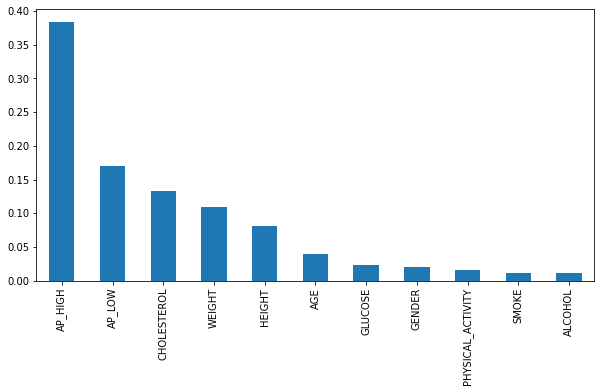

In [ ]:
feature_imp6.plot(kind='bar',figsize=(10,5))

____
____

Les tests montrent que la précision moyenne des modèles de connaissance du contexte est de: 75,821%, ce qui est généralement mieux que la précision générale du modèle.
___
à partir des expérimentations ci-dessus, nous voyons que la précision des modèles prend en compte le contexte surpasse le modèle général lorsque l'âge est compris entre 30 et 50 ans ([30,50]) mais que la précision générale du modèle l'emporte lorsque l'âge est compris entre 51 et 65 ans ([51, 65]).
___
dans les cellules qui suivent, nous allons essayer de tester nos modèles de prise de conscience des contextes parallèlement au modèle général sur le même ensemble de test que nous avons testé dans le modèle général et voir si la précision augmentera. .
___

In [ ]:
X = df.drop("CARDIO_DISEASE", axis = 1)
Y = df['CARDIO_DISEASE']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42,shuffle = True)

In [ ]:
CA_model1=pickle.load(open('/content/Drive/MyDrive/context awareness models/cardiovascular models/random forest models/model 1 optimized acc_86_016.sav', 'rb'))
CA_model2=pickle.load(open('/content/Drive/MyDrive/context awareness models/cardiovascular models/random forest models/model 2 optimized acc_80_465.sav', 'rb'))
CA_model3=pickle.load(open('/content/Drive/MyDrive/context awareness models/cardiovascular models/random forest models/model 3 optimized acc_75_442.sav', 'rb'))
G_model=pickle.load(open('/content/Drive/MyDrive/Cardio vascular models/model random forest with cross validation acc_73_397.sav', 'rb'))

In [ ]:
df_test = X_test

In [ ]:
df_test.head()

,AGE,GENDER,HEIGHT,WEIGHT,AP_HIGH,AP_LOW,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY
6257,59,1,157,85,120,80,1,1,0,0,1
45464,55,1,160,59,100,70,1,1,0,0,0
44282,50,1,168,65,120,80,1,1,0,0,1
58357,58,2,170,105,120,80,1,1,1,0,1
24960,44,2,177,114,130,80,1,1,0,0,1


In [ ]:
y_test.head()

6257     1
45464    0
44282    0
58357    0
24960    1
Name: CARDIO_DISEASE, dtype: int64

In [ ]:
df_test['CARDIO_DISEASE']=y_test

In [ ]:
df_test.head()

,AGE,GENDER,HEIGHT,WEIGHT,AP_HIGH,AP_LOW,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY,CARDIO_DISEASE
6257,59,1,157,85,120,80,1,1,0,0,1,1
45464,55,1,160,59,100,70,1,1,0,0,0,0
44282,50,1,168,65,120,80,1,1,0,0,1,0
58357,58,2,170,105,120,80,1,1,1,0,1,0
24960,44,2,177,114,130,80,1,1,0,0,1,1


In [ ]:
df_test_1=df_test.loc[(df['AGE'] >=30 ) & (df['AGE'] <=40)]
df_test_2=df_test.loc[(df['AGE'] >40 ) & (df['AGE'] <=45)]
df_test_3=df_test.loc[(df['AGE'] >45 ) & (df['AGE'] <=50)]
df_test_4=df_test.loc[(df['AGE'] >50 ) & (df['AGE'] <=65)]

In [ ]:
X1_test = df_test_1.drop("CARDIO_DISEASE", axis = 1)
Y1_test = df_test_1['CARDIO_DISEASE']

X2_test = df_test_2.drop("CARDIO_DISEASE", axis = 1)
Y2_test = df_test_2['CARDIO_DISEASE']

X3_test = df_test_3.drop("CARDIO_DISEASE", axis = 1)
Y3_test = df_test_3['CARDIO_DISEASE']

X4_test = df_test_4.drop("CARDIO_DISEASE", axis = 1)
Y4_test = df_test_4['CARDIO_DISEASE']

In [ ]:
X1_test_train1, X1_test_test1, Y1_test_train1, Y1_test_test1 = train_test_split(X1_test, Y1_test, test_size=0.2, random_state=42,shuffle = True)

X2_test_train2, X2_test_test2, Y2_test_train2, Y2_test_test2 = train_test_split(X2_test, Y2_test, test_size=0.2, random_state=42,shuffle = True)

X3_test_train3, X3_test_test3, Y3_test_train3, Y3_test_test3 = train_test_split(X3_test, Y3_test, test_size=0.2, random_state=42,shuffle = True)

X4_test_train4, X4_test_test4, Y4_test_train4, Y4_test_test4 = train_test_split(X4_test, Y4_test, test_size=0.2, random_state=42,shuffle = True)

In [ ]:
prediction_test_test1 = CA_model1.predict(X1_test_test1)

prediction_test_test2 = CA_model2.predict(X2_test_test2)

prediction_test_test3 = CA_model3.predict(X3_test_test3)

prediction_test_test4 = G_model.predict(X4_test_test4)

In [ ]:
print ("Accuracy of first model = ", metrics.accuracy_score(Y1_test_test1, prediction_test_test1))

print ("Accuracy of second model = ", metrics.accuracy_score(Y2_test_test2, prediction_test_test2))

print ("Accuracy of third model = ", metrics.accuracy_score(Y3_test_test3, prediction_test_test3))

print ("Accuracy of fourth model = ", metrics.accuracy_score(Y4_test_test4, prediction_test_test4))

Accuracy of first model =  0.8524590163934426
Accuracy of second model =  0.8106312292358804
Accuracy of third model =  0.7656826568265682
Accuracy of fourth model =  0.6925238898257448


In [ ]:
overall_acc = (metrics.accuracy_score(Y1_test_test1, prediction_test_test1)+metrics.accuracy_score(Y2_test_test2, prediction_test_test2)+metrics.accuracy_score(Y3_test_test3, prediction_test_test3)+metrics.accuracy_score(Y4_test_test4, prediction_test_test4))/4


In [ ]:
print ("The Overall Accuracy of combined models = ", overall_acc)

The Overall Accuracy of combined models =  0.780324198070409


à partir des dernières expériences, nous avons constaté une augmentation notable de la précision lorsque nous avons utilisé une approche de sensibilisation au contexte
de 73% à 78%